<h2>Содержание<span class="tocSkip"></span></h2>
<p> </p>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Изучение-данных-из-файла" data-toc-modified-id="1-Изучение-данных-из-файла"><span class="toc-item-num"></span>1 Изучение данных из файла</a></span></li><li><span><a href="#2-Предобработка-данных" data-toc-modified-id="2-Предобработка-данных"><span class="toc-item-num"></span>2 Предобработка данных</a></span></li><li><span><a href="#3-Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="3-Расчёты-и-добавление-результатов-в-таблицу"><span class="toc-item-num"></span>3 Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#4-Исследовательский-анализ-данных" data-toc-modified-id="4-Исследовательский-анализ-данных"><span class="toc-item-num"></span>4 Исследовательский анализ данных</a></span></li><li><span><a href="#5-Общий-вывод" data-toc-modified-id="5-Общий-вывод"><span class="toc-item-num"></span>5 Общий вывод

# Исследование объявлений о продаже квартир

Представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

## 1 Изучение данных из файла

In [1]:
#импорт бибилиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('real_estate_data.csv', sep = '\t') # чтение файла с данными и сохранение в data
data.head() # получим первыt 5 строк таблицы data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о таблице:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца и 23699 строк. В 2 столбцах тип данных - bool, в 14 - float, в 3 - int, и 3 столбца имеют тип данных - object. Также выявлено, что некоторые столбцы имеют тип данных `float`, но отражают информацию о целом значении.
Для дальнейшей работы удобнее изменить этот тип данных на `int`. Кроме того один столбец `is_apartment` предполагает тип данных `bool`, но имеет другой тип. В следующем разделе приведем эти данные в порядок. Кроме того, далеко не все столбцы имеют данные, в разделе 2 устраним пробелы. 

In [4]:
data.describe() #также посмотрим разброс значений для каждого столбца датасета

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В столбце `total_area` максимальное значение - 900 м2, что не совсем правдоподобно для площади квартиры, то же касается максимальных значений в столбцах `rooms` и `ceiling_height` - такие значения больше подходят для промышленных зданий. Аналогичная ситуация в столбцах `living_area` и `kitchen_area` - малоправдоподобные значения данных площадей для жилых квартир. Необходимо далее проверить адекватность этих данных.

### **Вывод**

При первом прочтении файла с данным выявлено немало проблем. Датасет требует предобработки данных, для дальнейшего использования при анализе.

## 2 Предобработка данных

Посмотрим на количество пропусков в датасете.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- В столбце `ceiling_height` существуют пропущенные значения. Высота потолков довольно частно является стандартной, поэтому далее вычислим медианную величину по заполненным данным и заполним пропуски в этом столбце полученными данными.
- В столбце `floors_total`  пропущено 0,4% значений. Данные будут использоваться в анализе, при этом достаточно точно заполнить пропуски нельзя, поэтому все строки с пропусками стоит удалить.
- В столбце `living_area` также существуют пропуски, их можно заполнить по средним зачениям, сгруппировав квартиры по количеству комнат. То же касается и столбца `kitchen_area`.
- В столбце `is_apartment` заполненно всего около 12% строк. Пропущенными значениями могут быть False или может хозяин квартиры просто не пожелал указывать тип "апартаменты". Пока оставим пропущенные значения пропущенными.
- В столбце `balcony`заполнено 50% информации, вероятнее остальные 50% подходят под то, что балконов у квартиры просто нет. Нужно заменить эти данные на 0.
- В столбце `locality_name` всего 49 значений из 23699 не заполнены. Данные будут использоваться в анализе, при этом достаточно точно заполнить пропуски нельзя, поэтому все строки с пропусками стоит удалить.
- В столбцах `airports_nearest`, `cityCenters_nearest` количество пропусков примерно одинаковое, то же самое и для столбцов `parks_around3000`, `ponds_around3000` , `parks_nearest` , `ponds_nearest`. Вероятно эти данные относятся к квартирам, сильно удаленным от Санкт-Петербурга, подходящих значений для замены просто нет, оставим эти пропуски.
- Последний стобец `days_exposition` имеет 3181 пропуск, 13% от всех значений. Либо данные отсутствуют по причине того, что объявление еще не снято с публикации (хотя данные по архиву объявлений), либо люди просто забыли снять их с публикации. Для дальнейшего использования данных в анализе заменим пропуски на медианное значение.

Заполним пропуски в стобце `ceiling_height`:

In [6]:
#вычислим медианную величину потолков и заменим полученными данными пропуски 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

Удалим все пропуски в столбце `floors_total`:

In [7]:
data.dropna(subset=['floors_total'], inplace=True)

Заполним пропуски в стобце `living_area` и `kitchen_area`:

In [8]:
# заменим пропущенные значения жилой площади в квартирах на среднее значение по количеству комнат
data['living_area'] = data.groupby('rooms')['living_area'].transform(lambda x : x.fillna(x.mean()))

# заменим пропущенные значения площади кухни в квартирах-студиях на нули
data.loc[data['studio'] == True, 'kitchen_area'] = 0 

# заменим пропущенные значения площади кухни в остальных квартирах на среднее значение по количеству комнат
data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].transform(lambda x : x.fillna(x.mean()))

Заполним пропуски в стобце `balcony`:

In [9]:
data['balcony'] = data['balcony'].fillna(0) 

Удаляем строки с пропущенными значениями в названиях населенного пункта:

In [10]:
data.dropna(subset=['locality_name'], inplace=True)

Заполним пропуски в стобце `days_exposition`:

In [11]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()) 

Для дальнейшей работы в некоторых столбцах, имеющих численные значения нужно изменить тип данных, чтобы расчеты производились корректно и визуализировать данные было удобнее.

In [12]:
columns = ['last_price','total_area','living_area','days_exposition']    

for column in columns:
    data[column] = data[column].astype('int64')

#приведем данные с столбце 'first_day_exposition' к формату даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']) 

Также проверим таблицу на наличие явных дубликатов: 

In [13]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


### **Вывод**

- Для дальнейшего анализа датасета пропуски были заполнены на медианные значения в столбцах `ceiling_height`, `days_exposition`. 
- В столбцах `living_area` и `kitchen_area`, были вычислены средние значения площадей, сгруппированные по квартирам с разным количеством комнат.
- Строки с пропусками в столбцах `floors_total` и `locality_name` были удалены.
- Пропущенные значения в столбце `balcony` заполнены нулями.
- Пропуски в остальных столбцах: `is_apartment`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` ,`parks_nearest` , `ponds_nearest` - были оставлены без изменений.

## 3 Расчёты и добавление результатов в таблицу

Для исследовательского анализа данных сделаем несколько расчетов и добавим столбцы в таблицу:

In [14]:
data['metre_price'] = data['last_price']/data['total_area'] #просчитаем цену квадратного метра

In [15]:

#добавим в таблицу столбцы с днем недели публикации объявления, месяцем и годом.
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [16]:
#добавим в таблицу столбец с категорией этажа квартиры: первый, последний, другой
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type,axis = 1)

In [17]:
#просчитаем соотношение жилой площади к общей
data['living_area_to_total'] = round(data['living_area']/data['total_area'],2)

#просчитаем соотношение площади кухни к общей
data['kitchen_area_to_total'] = round(data['kitchen_area']/data['total_area'],2)

## 4 Исследовательский анализ данных

### **4.1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков.**

**4.1.1** Построим гистограмму для параметра "площадь":

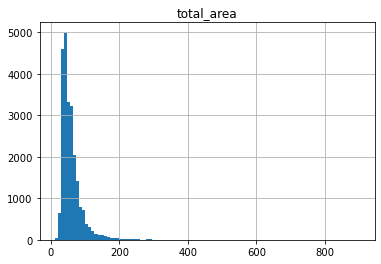

In [18]:
data.hist('total_area',bins=100);

Основная часть данных лежит в диапазоне от 0 до 200 м2. Также имеются данные по площади превышающие значения в 200м2. 
Нарисуем диаграмму размаха для data, ограничив диапазон по вертикали значениями -10 и 200.

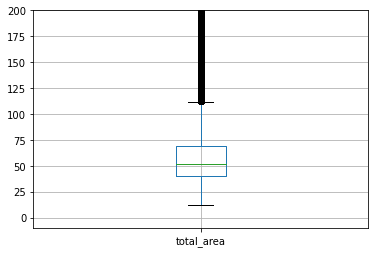

In [19]:
data.boxplot('total_area');
plt.ylim(-10,200);

Большая часть значений лежит в диапазоне до 80м2, что выглядит правдоподобно. Сравним числовое описание с диаграммой размаха:

In [20]:
data['total_area'].describe()

count    23565.000000
mean        60.095226
std         35.668758
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

Среднее и медиана практически равны по значениям. А значит сильных аномалей в данных нет, которые повлияли бы кратно на среднее значение.

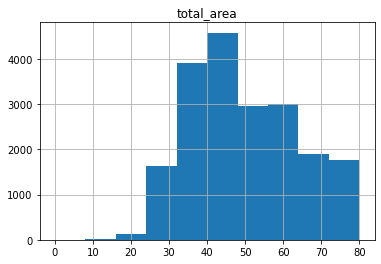

In [21]:
data.hist('total_area',range=(0,80)); #Построим гистограмму отсеев аномальные значения

**4.1.2.** Построим гистограмму для параметра "цена":

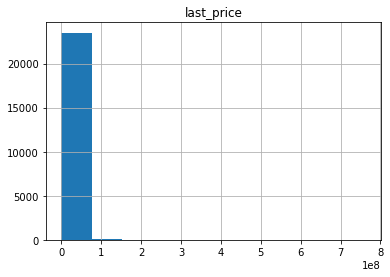

In [22]:
data.hist('last_price');

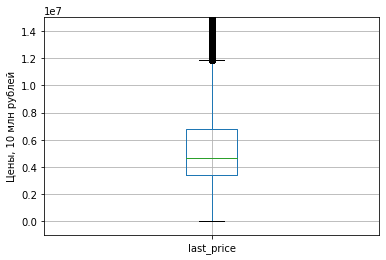

In [23]:
data.boxplot('last_price');
plt.ylim(-1000000, 15000000);
plt.ylabel('Цены, 10 млн рублей');

По диаграмме видно, что основные значения цены лежат в диапазоне до 8 млн. рублей.Сравним числовое описание с диаграммой размаха:

In [24]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Среднее почти в 1,5 раза больше медианной цены. Значит в данных присутствуют значения, влияющие на среднее. Отсеим их и построим гистограмму по даным диаграммы размаха.

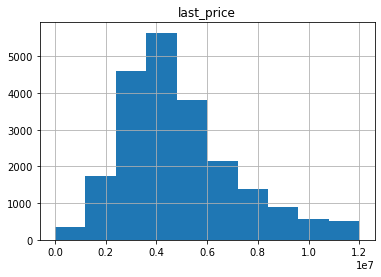

In [25]:
data.hist('last_price', range=(0,1.2e7));

В основном квартиры продаются по цене в диапазоне до 12 млн рублей.

**4.1.3** Построим гистограмму для параметра "число комнат":

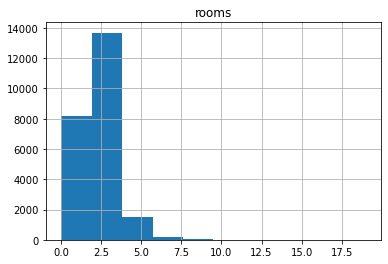

In [26]:
data.hist('rooms');

По гистограмме видно, что основные значения лежат в диапазоне до 8. Постороим диаграмму размаха по этим границам, а также вызовем метод describe() для анализа числовых значений.

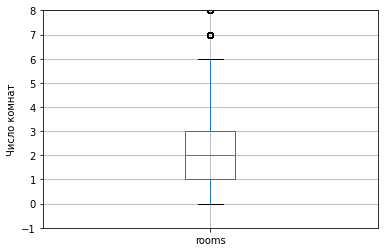

In [27]:
data.boxplot('rooms');
plt.ylim(-1, 8);
plt.ylabel('Число комнат');

In [28]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В основном значения количества комнат в квартирах лежит в диапазоне от 1 до 6. По диаграмме размаха простроим гистограмму по количеству комнат в квартирах.

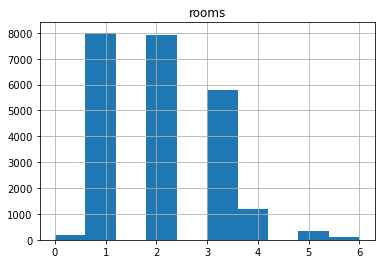

In [29]:
data.hist('rooms', range=(0,6));

Ожидаемые значения квартир по количеству комнат от 1 до 4 оправдались.

**4.1.4** Построим гистограмму для параметра "высота потолков":

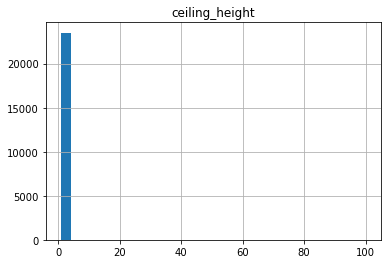

In [30]:
data.hist('ceiling_height', bins=30);

Основные значения лежат в диапазоне от 2 до 5. Постороим диаграмму размаха по этим границам, а также вызовем метод describe() для анализа числовых значений.

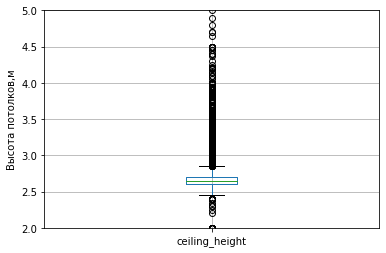

In [31]:
data.boxplot('ceiling_height');
plt.ylim(2, 5);
plt.ylabel('Высота потолков,м');

In [32]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Средние и медианные значения не сильно отличаются, а значит, что аномальных значений в выборке мало. По диаграмме размаха простроим гистограмму по высоте потолков.

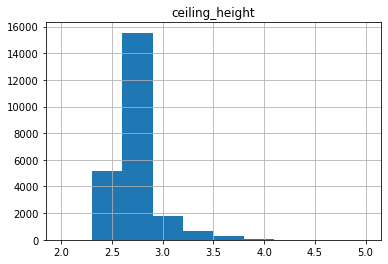

In [33]:
data.hist('ceiling_height', range=(2,5));

Есть несколько выбивающихся значений в выборке. Но в целом ожидаемые значения высоты потолков в 2,7 м оправдались.

**4.1.5** Построим гистограмму для параметра "время продажи квартиры":

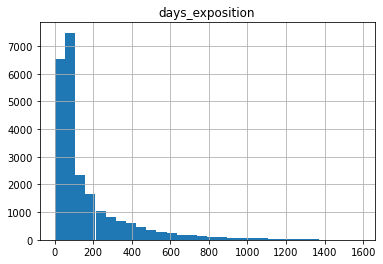

In [34]:
data.hist('days_exposition', bins=30);

Посмотрим на диаграмму размаха.

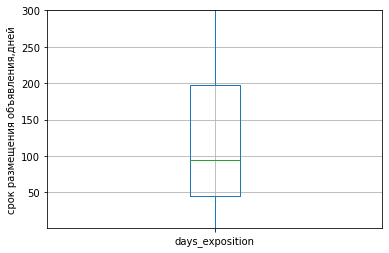

In [35]:
data.boxplot('days_exposition');
plt.ylim(1, 300);
plt.ylabel('срок размещения объявления,дней');

Основные продажи квартир происходят до 200 дней. Посмотрим численное описание значений:

In [36]:
data['days_exposition'].describe()

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Средние и медианные значения сильно отличаются, а значит, что в данных присутствуют аномальные значения влияющие на среднее. Ограничим диапазон данных и построим гистограмму по этим значениям.

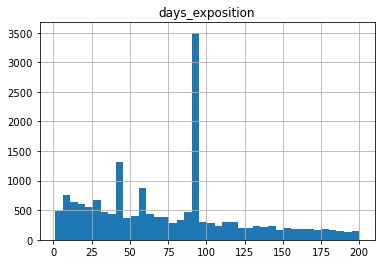

In [37]:
data.hist('days_exposition', range=(1,200), bins=40);

Есть пиковые значения в районе 90 дней. Квартиры проданные за этот срок, ничем не отличаются по параметрам от других квартир. Возможно это значения из пропусков, где мы сделали замену на медианные значения.

### **Выводы:**

Средняя квартира, выставленная на продажу, имеет следующие характеристики: это 1 - 2 -комнатная квартира площадью 40 - 60 м2 с потолками 2,65 - 2,70 м, по цене от 3 до 6 млн рублей.

Как правило, продажа недвижимости занимала около 3 месяцев. При этом четверть всех объектов недвижимости была продана в течение 25 дней с момента публикации. 
Если срок сделки не превышал 14 дней, то можно рассматривать такие сделки как мошеннические. Аномально долгая продажа - продажи дольше 400 дней с момента публикации.

**4.1.6** Уберем редкие и выбивающиеся значения.

Проанализировав основные параметры квартиры, можно отбросить аномальные характеристики квартир из представленного набора данных:

- 6-комнатная квартира или больше;
- площадь более 100 м2 и менее 10м2;
- потолки менее 2,25 м или более 3,5 м;
- цена более 12 млн рублей и менее 1 млн рублей;
- срок публикации объявления менее 14дней и более 400дней.

In [38]:
good_data = data.query('10 <= total_area <= 100 and 0.1e7 <= last_price <= 1.2e7 and rooms <=6 and 2.25 <= ceiling_height <= 3.5 and 14 <= days_exposition <= 400')

In [39]:
print('Доля чистых значений составила: {:.1%}'.format(len(good_data) / len(data)))

Доля чистых значений составила: 72.6%


### **4.2 Влияние факторов на стоимость квартиры**

**4.2.1** Изучим зависит ли цена от площади, числа комнат, удаленности от центра, этажности и даты размещения.

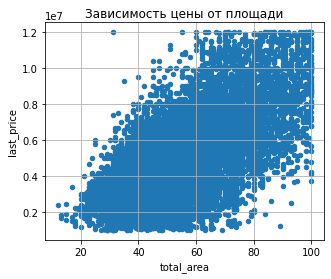

In [40]:
good_data.plot(x='total_area', y='last_price', kind='scatter', figsize=(5,4), grid=True, title='Зависимость цены от площади');

In [41]:
corr_price_area = good_data['last_price'].corr(good_data['total_area'])
print('Коэффициент корреляции: {:.2f}'.format(corr_price_area)) 

Коэффициент корреляции: 0.69


По данному графику видно очевидное, чем больше площадь, тем больше цена квартиры. То же и подтверждает коэффициент корреляции.

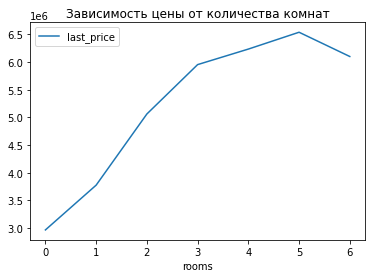

In [42]:
(
    good_data
    .pivot_table(index='rooms', values='last_price')
    .plot(y='last_price',title='Зависимость цены от количества комнат')
);

Снова ожидаемая закономерность, чем больше комнат, тем дороже недвижимость.

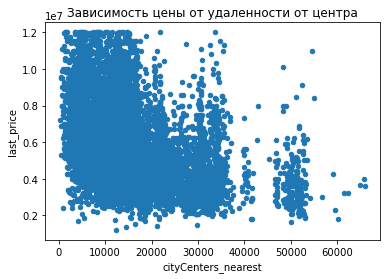

In [43]:
good_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', title='Зависимость цены от удаленности от центра');

In [44]:
corr_price_center = good_data['last_price'].corr(good_data['cityCenters_nearest'])
print('Коэффициент корреляции: {:.2f}'.format(corr_price_center)) 

Коэффициент корреляции: -0.33


В основном ожидаемый результат: чем ближе к центру, тем дороже квартиры. Выбиваются лишь некоторые данные, где расстояние до центра для квартиры не единственный фактор высокой цены. Коэффициент корреляции говорит то же самое - существует отрицательная зависимость при увеличении расстояния до центра, но зависимость несильная.

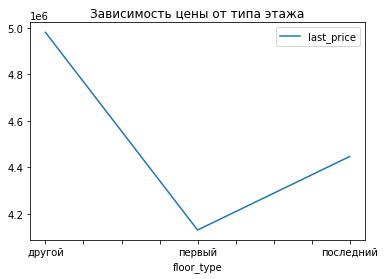

In [45]:
(
    good_data
    .pivot_table(index='floor_type', values='last_price')
    .plot(title='Зависимость цены от типа этажа')
);

График зависимости показал, что дешевле всего продаются квартиры на первом этаже. На втором месте квартиры на последнем этаже, ну а самые дорогие - на любом другом.

**4.2.2.** Посмотрим на зависимость цены квартиры от дня недели, месяца и года публикации объявения.

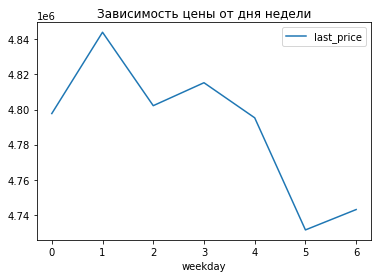

In [46]:
(
    good_data
    .pivot_table(index='weekday', values='last_price')
    .plot(title='Зависимость цены от дня недели')
);

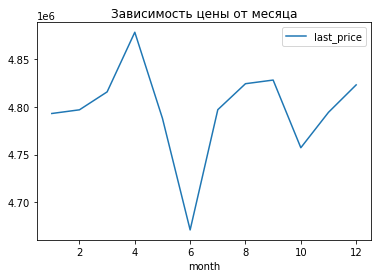

In [47]:
(
    good_data
    .pivot_table(index='month', values='last_price')
    .plot(title='Зависимость цены от месяца')
);

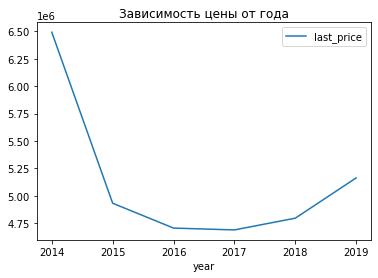

In [48]:
(
    good_data
    .pivot_table(index='year', values='last_price')
    .plot(title='Зависимость цены от года')
);

День недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан. Наблюдается лишь некоторый спад к концу недели, возможно потому что и количество публикаций в этот день меньше всего. 

График зависимости цены от года показал, что в среднем квартиры продавались по более высоким ценам в 2014 году, но это объясняется макроэкономической ситуацией. Далее рост цен произошел в 2019 году, но возможно это объясняется понижением ЦБ ключевой ставки, а значит и возросщим спросом на покупку квартир.

**4.2.3** Выберем 10 населенных пунктов с наибольшим числом объявлений.

In [49]:
median_metre_price = good_data.pivot_table(index='locality_name', values='metre_price', aggfunc=['count', 'median'])
median_metre_price.columns = ['count', 'median']
median_metre_price.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,10860,103132.267442
посёлок Мурино,425,86956.521739
посёлок Шушары,360,77223.320158
Всеволожск,327,66153.846154
Колпино,277,74324.324324
Пушкин,274,100000.000000
посёлок Парголово,265,91642.857143
Гатчина,241,67857.142857
деревня Кудрово,230,92828.571429


Из представленных 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин, деревня Кудрово.

Дешевле всего квартиры в Выборге, Всеволожске и Гатчине.

Цена квадратного метра в деревне больше, чем в городе. Необходимо будет установить, насколько такая разница в средней цене квадратного метра обоснована и вызвана близостью к центру Санкт-Петербурга

**4.2.4** Изучим объекты недвижимости в Санкт-Петербурге

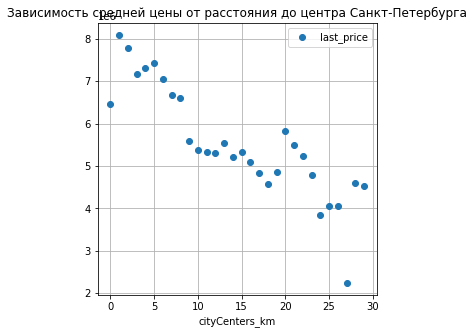

In [50]:
#создадим столбец с расстоянием квартир до центра в км.
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int64', errors='ignore')
data['cityCenters_km'] = round(data['cityCenters_nearest'] / 1000, 0) 
good_data = data.query('10 <= total_area <= 100 and 0.1e7 <= last_price <= 1.2e7 and rooms <=6 and 2.25 <= ceiling_height <= 3.5 and 14 <= days_exposition <= 400')

#посчитаем среднюю цену для каждого километра
(
    good_data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_km', values='last_price')
    .plot(y='last_price', style='o',grid=True, figsize=(5,5), title='Зависимость средней цены от расстояния до центра Санкт-Петербурга')
);

### **Вывод**

Резкий перепад цены в 1 млн рублей происходит на расстоянии в 8 км от центра, таким образом, центром Санкт-Петербурга будет считаться окружность радиусом 8 км.

### **4.3 Изучим недвижимость в центре Санкт-Петербурга.**

In [51]:
#отфильтруем данные по расстоянию до центра в 8 км
spb_center = good_data[(good_data['cityCenters_km'] <= 8) & (good_data['locality_name'] == 'Санкт-Петербург')]

Построим диаграмму размаха по площади, цене, числу комнат и высоте потолков.

count    1972.000000
mean       60.846856
std        18.814776
min        12.000000
25%        46.000000
50%        60.000000
75%        75.000000
max       100.000000
Name: total_area, dtype: float64


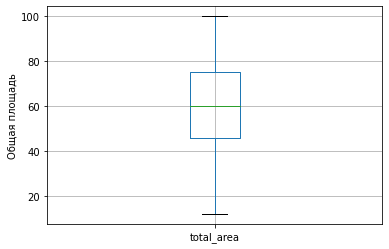

In [52]:
#посмотрим на числовое описание значений столбца 'total_area' и построим диаграмму размаха
print(spb_center['total_area'].describe())
spb_center.boxplot('total_area');
plt.ylabel('Общая площадь');

count    1.972000e+03
mean     7.118260e+06
std      2.190868e+06
min      1.686000e+06
25%      5.500000e+06
50%      6.932818e+06
75%      8.652500e+06
max      1.200000e+07
Name: last_price, dtype: float64


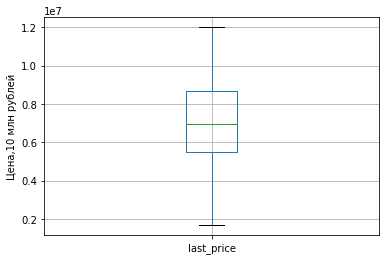

In [53]:
#посмотрим на числовое описание значений столбца 'last_prise' и построим диаграмму размаха
print(spb_center['last_price'].describe())
spb_center.boxplot('last_price');
plt.ylabel('Цена,10 млн рублей');

count    1972.000000
mean        2.167343
std         0.891580
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


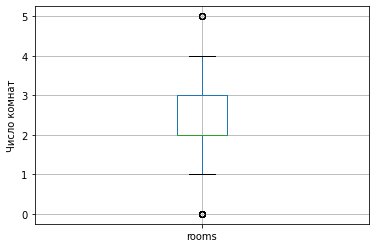

In [54]:
#посмотрим на числовое описание значений столбца 'rooms' и построим диаграмму размаха
print(spb_center['rooms'].describe())
spb_center.boxplot('rooms');
plt.ylabel('Число комнат');

count    1972.000000
mean        2.820857
std         0.251602
min         2.400000
25%         2.650000
50%         2.700000
75%         3.000000
max         3.500000
Name: ceiling_height, dtype: float64


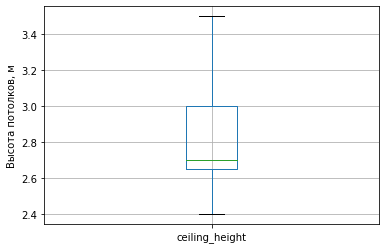

In [55]:
#посмотрим на числовое описание значений столбца 'ceiling_height' и построим диаграмму размаха
print(spb_center['ceiling_height'].describe())
spb_center.boxplot('ceiling_height');
plt.ylabel('Высота потолков, м');

count    1972.000000
mean      123.152637
std        92.903847
min        14.000000
25%        60.000000
50%        95.000000
75%       165.000000
max       400.000000
Name: days_exposition, dtype: float64


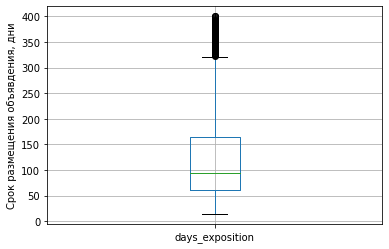

In [56]:
#посмотрим на числовое описание значений столбца 'days_exposition' и построим диаграмму размаха
print(spb_center['days_exposition'].describe())
spb_center.boxplot('days_exposition');
plt.ylabel('Срок размещения объявдения, дни');

Изучим влияние на стоимость квартиры таких факторов как: число комнат, этаж, удаленность от центра, дата размещения обявления.

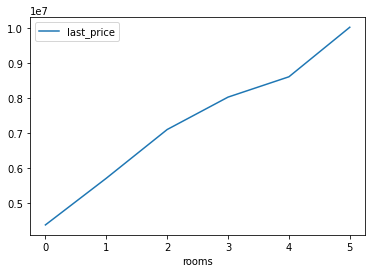

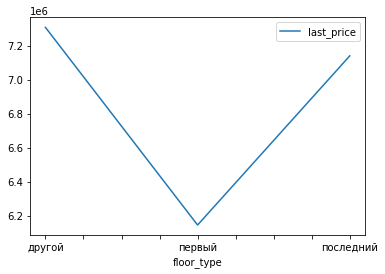

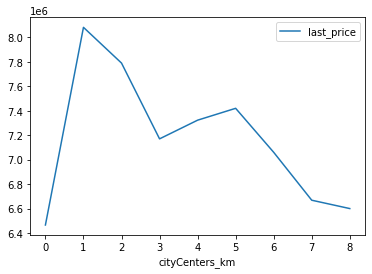

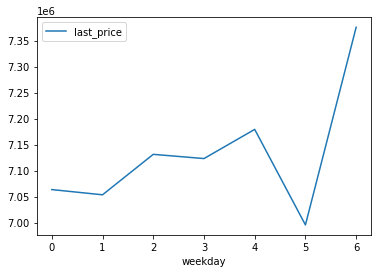

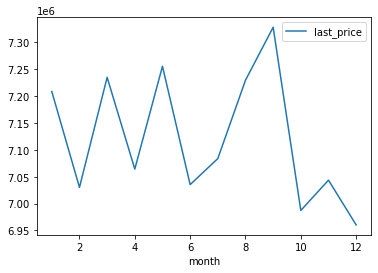

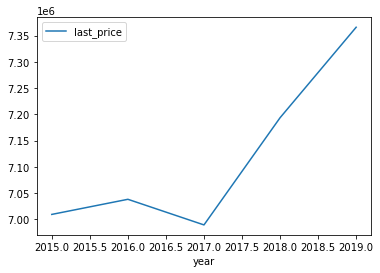

In [57]:
for column in ['rooms', 'floor_type', 'cityCenters_km', 'weekday', 'month', 'year']:
        (
            spb_center
            .pivot_table(index=column, values='last_price')
            .plot()
        )


### **Вывод**

Изучив диаграммы размаха по таким параметрам как: площадь, цена, число комнат, высота потолков, было выявлено, что средняя квартира, выставленная на продажу в центре Санкт-Петербурга имеет 2 комнаты, общей площадью 60 кв. м с потолками 2,65 м. Срок продажи занимает 3 месяца по цене около 6,9 млн рублей.


Изучив зависимость квартир в центра Санкт-Петербурга от числа комнат, было выявлено, что 5-комнатные квартиры пользуются большим спросом, что приводит к увеличению цены квартиры.

Кроме того, в центре города наблюдается явно выраженная зависимость от этажа квартиры: квартира на последнем этаже в среднем будет стоить дороже, чем на первом. В квартирах удаленных от центра, такой сильной зависимости не наблюдается.

График зависимости цены от расстояния до центр города показал, что квартира в 1 км от центра будет почти в 1,5 раза дороже квартиры в 8 км от центра.

Также проявилась сильная зависимость цены квартиры и дня публикации объявления. Объявления о продаже, которые публиковались по воскресеньям, продавались в среднем по более высокой цене. А вот год продажи пиковым был в 2018 году, в отличие от районов, где большая цена была именно в 2019г.

## 5 Общий вывод

Изучив 62% данных из исходного датасета, было выявлено, что для определения рыночной стоимости объектов недвижимости важны следующие параметры:

- общая площадь квартиры
- расстояние до центра города
- число комнат и этаж квартиры (чем ближе к центру, тем эти факторы важнее)

Кроме того, для отслеживания аномалий и мошеннических действий важен срок продажи квартиры (слишком быстрая продажа — до 14 дней, слишком долгая продажа — более 400 дней).
Также было замечено, что при вводе данных о высоте потолков было допущено множество ручных ошибок (27 м вместо 2,7 м, потолки менее 2 м и т.д.).